# Nous allons créer un ANN simple pour le célèbre jeu de données Titanic extraite sur kaggle

# Auteurs :
###  Hamady GACKOU
###   Alassane Fofana
###   Pascal Diarra

Maintenant que nous avons discuté de l'architecture, des avantages et des inconvénients, il est temps de créer un modèle ANN afin que nous sachions comment cela fonctionne.

Pour comprendre ANN, nous utiliserions la prédiction de survie titanesque de renommée mondiale. vous pouvez trouver l'ensemble de données ici https://www.kaggle.com/jamesleslie/titanic-neural-network-for-beginners/data?select=train_clean.csv.

### commençons par importer les dépendances


In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from numpy.random import seed
from tensorflow.random import set_seed

### Une fois que nous aurons importé toutes les bibliothèques de prétraitement et de modélisation, nous lirons les données de formation et de test

In [87]:
# Charger les données en tant que dataframe Pandas
train = pd.read_csv('./train_clean.csv', )
test = pd.read_csv('./test_clean.csv')
df = pd.concat([train, test], axis=0, sort=True)
df.head()

,Age,Cabin,Embarked,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


Nous avons concaténé à la fois l'apprentissage et le test CSV afin d'appliquer la même méthode de prétraitement sur les deux. une fois l'ensemble de données créé, nous commencerions à prétraiter l'ensemble de données car il comporte plusieurs colonnes qui ne sont pas des nombres. En commençant par le nom de colonne 'sex' dans l'ensemble de données, nous le convertirions en variables binaires.

In [88]:
# convertir en catégorie dtype
df['Sex'] = df['Sex'].astype('category')
# convert to category codes
df['Sex'] = df['Sex'].cat.codes

# Après cela, nous devons convertir le reste des variables :
categorical = ['Embarked', 'Title']
for var in categorical:
    df = pd.concat([df, 
                    pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]
# drop the variables we won't be using
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
df.head()














,Age,Family_Size,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,1,7.2500,0,3,1,1,0.0,0,0,1,0,0,0,1,0,0
1,38.0,1,71.2833,0,1,0,1,1.0,1,0,0,0,0,0,0,1,0
2,26.0,0,7.9250,0,3,0,0,1.0,0,0,1,0,0,1,0,0,0
3,35.0,1,53.1000,0,1,0,1,1.0,0,0,1,0,0,0,0,1,0
4,35.0,0,8.0500,0,3,1,0,0.0,0,0,1,0,0,0,1,0,0


## Mise en échelle (Normalisation)

In [89]:
continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size']
scaler = StandardScaler()
for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

Une fois le prétraitement terminé, nous devons diviser le train et tester à nouveau l'ensemble de données, pour cela, vous pouvez utiliser le code suivant.

In [90]:
X_train = df[pd.notnull(df['Survived'])].drop(['Survived'], axis=1)
y_train = df[pd.notnull(df['Survived'])]['Survived']
X_test = df[pd.isnull(df['Survived'])].drop(['Survived'], axis=1)

## Il est maintenant temps de définir les hyperparamètres et de définir l'architecture du modèle ANN.

In [91]:
lyrs=[8]
act='linear' 
opt='Adam'
dr=0.0
# set random seed for reproducibility
seed(42)
set_seed(42)
model = Sequential()
# create first hidden layer
model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
# create additional hidden layers
for i in range(1,len(lyrs)):
    model.add(Dense(lyrs[i], activation=act))
# add dropout, default is none
model.add(Dropout(dr))
# create output layer
model.add(Dense(1, activation='sigmoid'))  # output layer
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dropout_6 (Dropout)         (None, 8)                 0         
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None


### Après la définition du modèle, nous ajusterons le modèle sur nos données d'entraînement et obtiendrons l'aperçu du modèle.

nval_acc: 81.14%


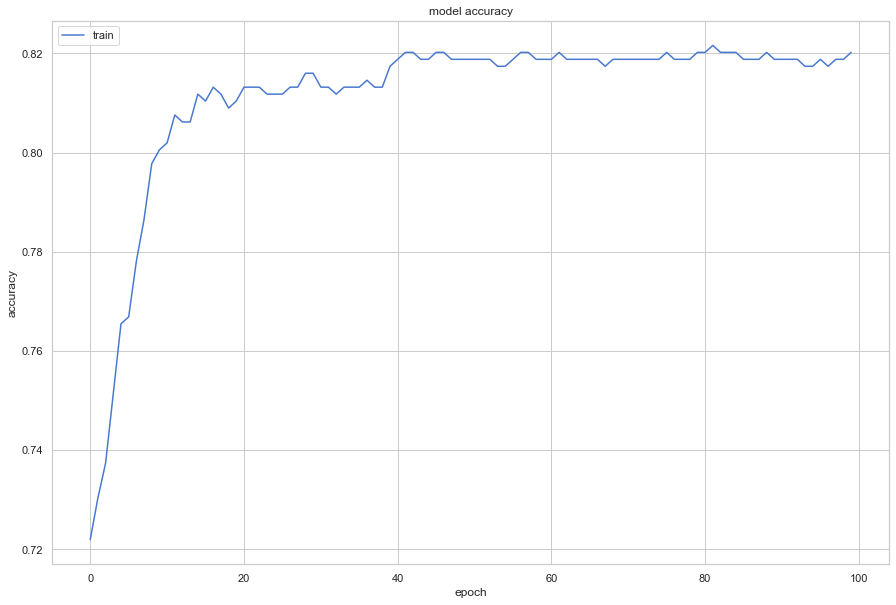

In [92]:
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['accuracy'])
print("n%s: %.2f%%" % ('val_acc', val_acc*100))
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Vous pouvez maintenant utiliser le modèle pour les prédictions sur les données de test, en utilisant le bloc de code suivant :

In [93]:
# calculate predictions
test['Survived'] = model.predict(X_test)
test['Survived'] = test['Survived'].apply(lambda x: round(x,0)).astype('int')
solution = test[['PassengerId', 'Survived']]
print(solution)

14/14 [==============================] - 1s 8ms/step
     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


#                                 THank you for very much for reading